In [1]:
import pandas as pd
import re
import numpy as np

import tensorflow as tf
import shap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [2]:
DANU_Ingredients = pd.read_csv("Source/DANU Ingredients.txt", sep='\t', dtype=str)

In [3]:
split_columns = DANU_Ingredients['drug_id'].str.split(':', n=1, expand=True)
split_columns

,0,1
0,1,1
1,2,2
2,2,3
3,2,4
4,2,5
5,2,6
6,2,7
7,2,8
8,2,9
9,2,10


In [4]:
DANU_Ingredients['class'] = split_columns[0]

DANU_Ingredients['molecule'] = split_columns[1]

In [5]:
DANU_Ingredients

,drug_id,generic_name,drug_group,drug_class,indication,class,molecule
0,1:1,Metformin,Biguanide,Biguanide,Diabetes,1,1
1,2:2,Orlistat,Antiobesity,Weight Loss,Obesity,2,2
2,2:3,Benzphetamine,Antiobesity,Anorectic,Obesity,2,3
3,2:4,Dextroamphetamine,Antiobesity,Anorectic,Obesity Nonspecific,2,4
4,2:5,Diethylpropion,Antiobesity,Anorectic,Obesity,2,5
5,2:6,Lisdexamfetamine,Antiobesity,Anorectic,Obesity Nonspecific,2,6
6,2:7,Mazindol,Antiobesity,Anorectic,Obesity,2,7
7,2:8,Methylphenidate,Antiobesity,Anorectic,Obesity Nonspecific,2,8
8,2:9,Phendimetrazine,Antiobesity,Anorectic,Obesity,2,9
9,2:10,Phentermine,Antiobesity,Anorectic,Obesity,2,10


In [6]:
DANU_Ingredients['molecule'].nunique()

57

In [7]:
drug_group_filter = DANU_Ingredients['drug_group'].isin(["GLP1 Injectable", "GLP1 Oral"])

filtered_molecules = DANU_Ingredients.loc[drug_group_filter, 'molecule']

string_GLP1 = r'\b(' + '|'.join(re.escape(molecule) for molecule in filtered_molecules) + r')\b'

In [8]:
string_GLP1

'\\b(47|48|49|50|51|52|53|54)\\b'

In [9]:
DIA_Drug_Histories = pd.read_csv("Source/DIA Drug Histories.txt", sep='\t', dtype=str)
Treatment_exp_Vector = pd.read_csv("Source/Treatment_exp_Vector.txt", sep=',', dtype=str)

In [10]:
Treatment_exp_Vector

,patient,weight
0,PT078206188,128.05
1,PT078208865,126.55
2,PT078209006,128.25
3,PT078209050,129.25
4,PT078234344,129.25
...,...,...
236978,PT770869809,96.5
236979,PT771068622,96.5
236980,PT771756084,104.71
236981,PT771997051,130.19


In [11]:

DIA_Drug_Histories = Treatment_exp_Vector.merge(DIA_Drug_Histories, on=['patient','weight'], how='left')

In [12]:
columns_to_drop = ['disease', 'weight']
DIA_Drug_Histories = DIA_Drug_Histories.drop(columns=columns_to_drop)

In [13]:
DIA_Drug_Histories

,patient,month1,month2,month3,month4,month5,month6,month7,month8,month9,...,month51,month52,month53,month54,month55,month56,month57,month58,month59,month60
0,PT078206188,1,1,1,1,1,1,1,1,1,...,-,-,-,-,-,-,-,-,-,-
1,PT078208865,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,"38,1","38,1"
2,PT078209006,"33,1","33,1","33,1","33,1","33,1","33,1","33,1","33,1","33,1",...,"33,1","33,1","33,1","33,1","33,1","33,1","33,1","33,1","33,1","36,33,1"
3,PT078209050,-,-,-,-,-,-,-,-,-,...,49,"34,36","34,36","34,36",34,34,34,-,-,-
4,PT078234344,-,-,-,-,-,-,-,-,1,...,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236978,PT770869809,35,35,35,35,35,35,35,35,35,...,"35,1","49,35,1","49,35,1","49,35,1","49,35,1","49,35","49,35","49,35","49,35","49,35,1"
236979,PT771068622,-,-,-,-,-,-,1,1,1,...,1,1,1,1,1,1,1,1,1,1
236980,PT771756084,-,-,-,-,-,-,-,-,-,...,1,1,1,1,1,1,1,1,1,1
236981,PT771997051,28,28,28,28,28,28,28,28,28,...,-,-,-,-,-,-,-,-,-,-


In [14]:
value_vars = DIA_Drug_Histories.columns[DIA_Drug_Histories.columns != 'patient']
value_vars

Index(['month1', 'month2', 'month3', 'month4', 'month5', 'month6', 'month7',
       'month8', 'month9', 'month10', 'month11', 'month12', 'month13',
       'month14', 'month15', 'month16', 'month17', 'month18', 'month19',
       'month20', 'month21', 'month22', 'month23', 'month24', 'month25',
       'month26', 'month27', 'month28', 'month29', 'month30', 'month31',
       'month32', 'month33', 'month34', 'month35', 'month36', 'month37',
       'month38', 'month39', 'month40', 'month41', 'month42', 'month43',
       'month44', 'month45', 'month46', 'month47', 'month48', 'month49',
       'month50', 'month51', 'month52', 'month53', 'month54', 'month55',
       'month56', 'month57', 'month58', 'month59', 'month60'],
      dtype='object')

In [15]:
DIA_Drug_Histories = DIA_Drug_Histories.melt(id_vars=['patient'], var_name='Month', value_name='Drugs', 
                                             value_vars=value_vars, col_level=0)


In [16]:
DIA_Drug_Histories

,patient,Month,Drugs
0,PT078206188,month1,1
1,PT078208865,month1,-
2,PT078209006,month1,"33,1"
3,PT078209050,month1,-
4,PT078234344,month1,-
...,...,...,...
14218975,PT770869809,month60,"49,35,1"
14218976,PT771068622,month60,1
14218977,PT771756084,month60,1
14218978,PT771997051,month60,-


In [17]:
DIA_Drug_Histories = DIA_Drug_Histories[DIA_Drug_Histories['Drugs'] != "-"]


In [18]:
DIA_Drug_Histories

,patient,Month,Drugs
0,PT078206188,month1,1
2,PT078209006,month1,"33,1"
5,PT078235722,month1,40
6,PT078237259,month1,1
7,PT078238705,month1,38
...,...,...,...
14218974,PT770149638,month60,1
14218975,PT770869809,month60,"49,35,1"
14218976,PT771068622,month60,1
14218977,PT771756084,month60,1


In [19]:
patient = DIA_Drug_Histories[DIA_Drug_Histories['Drugs'].str.contains(string_GLP1, na=False)]
patient = patient[['patient']]
patient = patient.drop_duplicates()



This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.


In [20]:
patient

,patient
74,PT078482969
82,PT078491654
121,PT078596294
249,PT080753869
295,PT080990372
...,...
14218479,PT767218753
14218611,PT767599445
14218751,PT767943088
14218892,PT768326232


In [21]:
DIA_Drug_Histories

,patient,Month,Drugs
0,PT078206188,month1,1
2,PT078209006,month1,"33,1"
5,PT078235722,month1,40
6,PT078237259,month1,1
7,PT078238705,month1,38
...,...,...,...
14218974,PT770149638,month60,1
14218975,PT770869809,month60,"49,35,1"
14218976,PT771068622,month60,1
14218977,PT771756084,month60,1


In [22]:
DIA_Drug_Histories = patient.merge(DIA_Drug_Histories, on='patient', how='left')

DIA_Drug_Histories

,patient,Month,Drugs
0,PT078482969,month1,"51,46,40,43,1"
1,PT078482969,month2,"51,46,1"
2,PT078482969,month3,"51,46,1"
3,PT078482969,month4,"51,46,40,1"
4,PT078482969,month5,"51,46,40,1"
...,...,...,...
2146267,PT768326232,month57,1
2146268,PT768326232,month58,1
2146269,PT768326232,month59,1
2146270,PT768326232,month60,"53,1"


In [23]:
DIA_Drug_Histories['Month'] = DIA_Drug_Histories['Month'].str.replace('month', 'm')

In [24]:
DIA_Drug_Histories

,patient,Month,Drugs
0,PT078482969,m1,"51,46,40,43,1"
1,PT078482969,m2,"51,46,1"
2,PT078482969,m3,"51,46,1"
3,PT078482969,m4,"51,46,40,1"
4,PT078482969,m5,"51,46,40,1"
...,...,...,...
2146267,PT768326232,m57,1
2146268,PT768326232,m58,1
2146269,PT768326232,m59,1
2146270,PT768326232,m60,"53,1"


In [25]:
month_mapping = {
    'm1': 'm01',
    'm2': 'm02',
    'm3': 'm03',
    'm4': 'm04',
    'm5': 'm05',
    'm6': 'm06',
    'm7': 'm07',
    'm8': 'm08',
    'm9': 'm09'
}

In [26]:
DIA_Drug_Histories['Month'] = DIA_Drug_Histories['Month'].replace(month_mapping)


In [27]:
DIA_Drug_Histories

,patient,Month,Drugs
0,PT078482969,m01,"51,46,40,43,1"
1,PT078482969,m02,"51,46,1"
2,PT078482969,m03,"51,46,1"
3,PT078482969,m04,"51,46,40,1"
4,PT078482969,m05,"51,46,40,1"
...,...,...,...
2146267,PT768326232,m57,1
2146268,PT768326232,m58,1
2146269,PT768326232,m59,1
2146270,PT768326232,m60,"53,1"


In [28]:
DIA_Drug_Histories['Drugs'] = DIA_Drug_Histories['Drugs'].str.split(',')

DIA_Drug_Histories

,patient,Month,Drugs
0,PT078482969,m01,"[51, 46, 40, 43, 1]"
1,PT078482969,m02,"[51, 46, 1]"
2,PT078482969,m03,"[51, 46, 1]"
3,PT078482969,m04,"[51, 46, 40, 1]"
4,PT078482969,m05,"[51, 46, 40, 1]"
...,...,...,...
2146267,PT768326232,m57,[1]
2146268,PT768326232,m58,[1]
2146269,PT768326232,m59,[1]
2146270,PT768326232,m60,"[53, 1]"


In [30]:
DIA_Drug_Histories = DIA_Drug_Histories.explode('Drugs', ignore_index=True)


In [31]:
DIA_Drug_Histories

,patient,Month,Drugs
0,PT078482969,m01,51
1,PT078482969,m01,46
2,PT078482969,m01,40
3,PT078482969,m01,43
4,PT078482969,m01,1
...,...,...,...
4767894,PT768326232,m58,1
4767895,PT768326232,m59,1
4767896,PT768326232,m60,53
4767897,PT768326232,m60,1


In [32]:
print("Unique Drugs Count:", DIA_Drug_Histories['Drugs'].nunique())
print("Unique Month Count:", DIA_Drug_Histories['Month'].nunique())
print("Unique Patient Count:", DIA_Drug_Histories['patient'].nunique())

Unique Drugs Count: 37
Unique Month Count: 60
Unique Patient Count: 55427


In [33]:
pd.DataFrame(DIA_Drug_Histories['Month'].unique()).rename(columns={0: "M"})

pd.DataFrame(DIA_Drug_Histories['Drugs'].unique()).rename(columns={0: "D"})

df = (pd.DataFrame(DIA_Drug_Histories['Month'].unique()).rename(columns={0: "M"}).assign(dummy=1)
    .merge(pd.DataFrame(DIA_Drug_Histories['Drugs'].unique()).rename(columns={0: "D"}).assign(dummy=1), on='dummy')
    .drop('dummy', axis=1)
)

df

,M,D
0,m01,51
1,m01,46
2,m01,40
3,m01,43
4,m01,1
...,...,...
2215,m60,17
2216,m60,15
2217,m60,18
2218,m60,29


In [34]:
df = df.assign(Var=df['M'] + '_' + df['D'])
df = df.drop(columns=['M', 'D'])
df

,Var
0,m01_51
1,m01_46
2,m01_40
3,m01_43
4,m01_1
...,...
2215,m60_17
2216,m60_15
2217,m60_18
2218,m60_29


In [35]:
df['patient'] = 'PTxxxxxx'

df = df[['patient', 'Var']] 

df['Exp'] = 0

df


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,patient,Var,Exp
0,PTxxxxxx,m01_51,0
1,PTxxxxxx,m01_46,0
2,PTxxxxxx,m01_40,0
3,PTxxxxxx,m01_43,0
4,PTxxxxxx,m01_1,0
...,...,...,...
2215,PTxxxxxx,m60_17,0
2216,PTxxxxxx,m60_15,0
2217,PTxxxxxx,m60_18,0
2218,PTxxxxxx,m60_29,0


In [36]:
DIA_Drug_Histories

,patient,Month,Drugs
0,PT078482969,m01,51
1,PT078482969,m01,46
2,PT078482969,m01,40
3,PT078482969,m01,43
4,PT078482969,m01,1
...,...,...,...
4767894,PT768326232,m58,1
4767895,PT768326232,m59,1
4767896,PT768326232,m60,53
4767897,PT768326232,m60,1


In [37]:
DIA_Drug_Histories = DIA_Drug_Histories.assign(Var=DIA_Drug_Histories['Month'] + '_' + DIA_Drug_Histories['Drugs'])

DIA_Drug_Histories = DIA_Drug_Histories.drop(columns=['Month', 'Drugs'])

In [38]:
DIA_Drug_Histories

,patient,Var
0,PT078482969,m01_51
1,PT078482969,m01_46
2,PT078482969,m01_40
3,PT078482969,m01_43
4,PT078482969,m01_1
...,...,...
4767894,PT768326232,m58_1
4767895,PT768326232,m59_1
4767896,PT768326232,m60_53
4767897,PT768326232,m60_1


In [39]:
DIA_Drug_Histories['Exp'] = 1

In [40]:
DIA_Drug_Histories = DIA_Drug_Histories.sort_values(by=['patient', 'Var'])


In [41]:
DIA_Drug_Histories

,patient,Var,Exp
3903177,PT078209050,m13_1,1
3903178,PT078209050,m25_1,1
3903179,PT078209050,m26_1,1
3903180,PT078209050,m27_1,1
3903181,PT078209050,m36_1,1
...,...,...,...
4260939,PT770869809,m59_35,1
4260938,PT770869809,m59_49,1
4260942,PT770869809,m60_1,1
4260941,PT770869809,m60_35,1


In [42]:
DIA_Drug_Histories['Var'].nunique()

2084

In [43]:
df['Var'].nunique()

2220

In [44]:
DIA_Drug_Histories = pd.concat([DIA_Drug_Histories, df], ignore_index=True)

In [45]:
DIA_Drug_Histories = DIA_Drug_Histories.pivot(index='patient', columns='Var', values='Exp')

In [46]:
DIA_Drug_Histories

Var,m01_1,m01_14,m01_15,m01_16,m01_17,m01_18,m01_21,m01_22,m01_23,m01_24,...,m60_44,m60_45,m60_46,m60_47,m60_48,m60_49,m60_50,m60_51,m60_52,m60_53
patient,,,,,,,,,,,,,,,,,,,,,
PT078209050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PT078326729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PT078329291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PT078333951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PT078334539,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PT768478027,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
PT768480760,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
PT768481083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [47]:
DIA_Drug_Histories = DIA_Drug_Histories.fillna(0)


In [48]:
DIA_Drug_Histories

Var,m01_1,m01_14,m01_15,m01_16,m01_17,m01_18,m01_21,m01_22,m01_23,m01_24,...,m60_44,m60_45,m60_46,m60_47,m60_48,m60_49,m60_50,m60_51,m60_52,m60_53
patient,,,,,,,,,,,,,,,,,,,,,
PT078209050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PT078326729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PT078329291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PT078333951,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PT078334539,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PT768478027,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
PT768480760,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
PT768481083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [49]:
DIA_Drug_Histories = DIA_Drug_Histories.drop(['PTxxxxxx'])

In [50]:
DIA_Drug_Histories.shape

(55427, 2220)

In [51]:
DIA_Drug_Histories.to_csv("DIA_Drug_Histories_All_Months_Processed.txt", sep='\t', index=False)


In [52]:
DIA_Drug_Histories.groupby('m60_47').size().reset_index(name='Count')

,m60_47,Count
0,0.0,53465
1,1.0,1962


In [53]:
sample_df = DIA_Drug_Histories.groupby('m60_47').apply(lambda x: x.sample(1500)).reset_index(drop=True)


In [54]:
sample_df.columns

Index(['m01_1', 'm01_14', 'm01_15', 'm01_16', 'm01_17', 'm01_18', 'm01_21',
       'm01_22', 'm01_23', 'm01_24',
       ...
       'm60_44', 'm60_45', 'm60_46', 'm60_47', 'm60_48', 'm60_49', 'm60_50',
       'm60_51', 'm60_52', 'm60_53'],
      dtype='object', name='Var', length=2220)

In [55]:
sample_df.dtypes
sample_df

Var,m01_1,m01_14,m01_15,m01_16,m01_17,m01_18,m01_21,m01_22,m01_23,m01_24,...,m60_44,m60_45,m60_46,m60_47,m60_48,m60_49,m60_50,m60_51,m60_52,m60_53
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2996,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
X = sample_df.drop('m60_47', axis=1)  
y = sample_df['m60_47']  

X = X.values
y = y.values


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [58]:
y_test

array([1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0.,
       1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0.,
       1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
       1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1.,
       1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
       1., 0., 1., 0., 0.

In [ ]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [59]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
     tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [60]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [114]:
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100
60/60 [==============================] - 1s 8ms/step - loss: 0.3930 - accuracy: 0.8479 - val_loss: 0.3076 - val_accuracy: 0.8833
Epoch 2/100
60/60 [==============================] - 0s 6ms/step - loss: 0.2024 - accuracy: 0.9281 - val_loss: 0.3091 - val_accuracy: 0.8833
Epoch 3/100
60/60 [==============================] - 0s 6ms/step - loss: 0.1532 - accuracy: 0.9510 - val_loss: 0.3356 - val_accuracy: 0.8708
Epoch 4/100
60/60 [==============================] - 0s 6ms/step - loss: 0.1353 - accuracy: 0.9484 - val_loss: 0.2291 - val_accuracy: 0.9083
Epoch 5/100
60/60 [==============================] - 0s 6ms/step - loss: 0.0915 - accuracy: 0.9677 - val_loss: 0.3188 - val_accuracy: 0.9042
Epoch 6/100
60/60 [==============================] - 0s 6ms/step - loss: 0.0589 - accuracy: 0.9786 - val_loss: 0.4046 - val_accuracy: 0.8958
Epoch 7/100
60/60 [==============================] - 0s 6ms/step - loss: 0.0527 - accuracy: 0.9854 - val_loss: 0.4485 - val_accuracy: 0.9083
Epoch 8/100
6

In [115]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  


19/19 [==============================] - 0s 1ms/step


In [116]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.915

In [117]:
confusion = confusion_matrix(y_test, y_pred)
confusion

array([[282,  31],
       [ 20, 267]], dtype=int64)

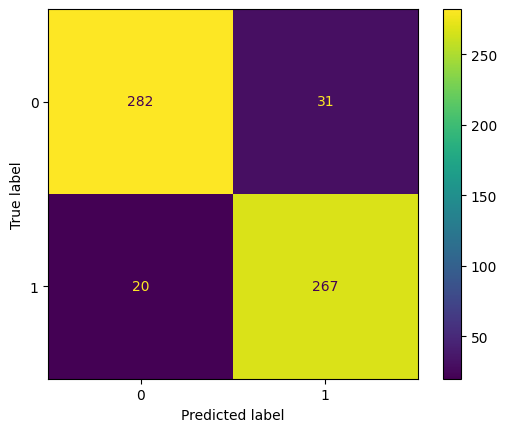

In [120]:
display = ConfusionMatrixDisplay(confusion)
display.plot()

In [232]:
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test, max_evals=3000)

Permutation explainer: 601it [19:17,  1.95s/it]                         


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


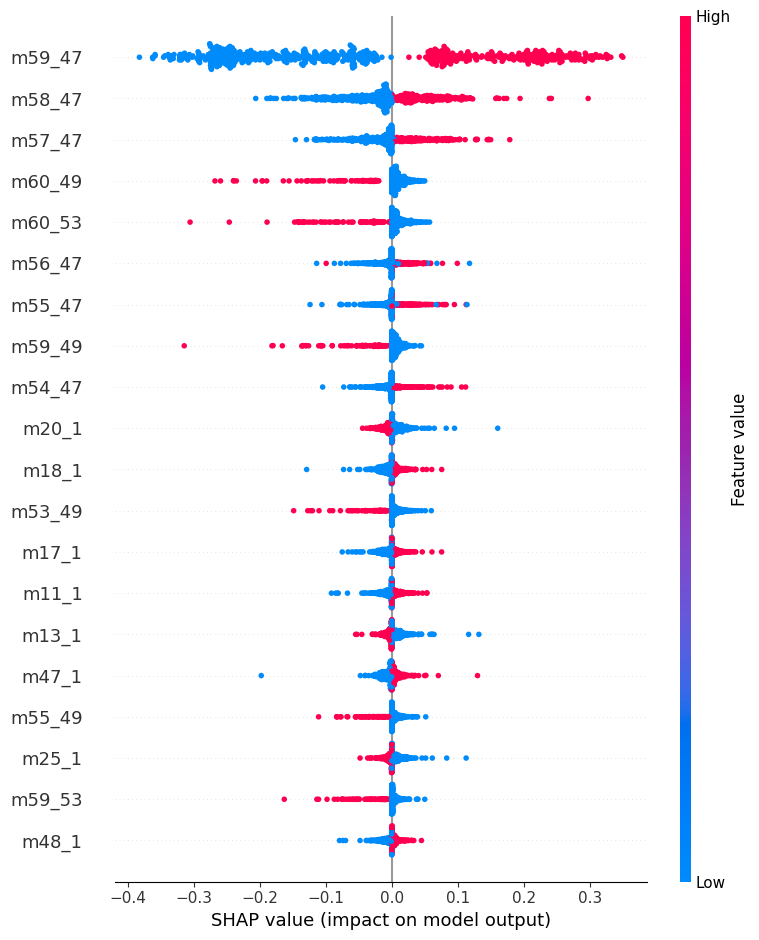

In [235]:

shap.summary_plot(shap_values, X_test, feature_names=sample_df.columns.drop('m60_47'), max_display=20)

In [121]:
confusion_matrix(sample_df['m60_47'].values, sample_df['m50_47'].values)

array([[1489,   11],
       [ 938,  562]], dtype=int64)

In [61]:
sample_df

Var,m01_1,m01_14,m01_15,m01_16,m01_17,m01_18,m01_21,m01_22,m01_23,m01_24,...,m60_44,m60_45,m60_46,m60_47,m60_48,m60_49,m60_50,m60_51,m60_52,m60_53
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2996,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
m01_df = sample_df.filter(like='m01_', axis=1).values
m02_df = sample_df.filter(like='m02_', axis=1).values
m03_df = sample_df.filter(like='m03_', axis=1).values
m04_df = sample_df.filter(like='m04_', axis=1).values
m05_df = sample_df.filter(like='m05_', axis=1).values
m06_df = sample_df.filter(like='m06_', axis=1).values
m07_df = sample_df.filter(like='m07_', axis=1).values
m08_df = sample_df.filter(like='m08_', axis=1).values
m09_df = sample_df.filter(like='m09_', axis=1).values
m10_df = sample_df.filter(like='m10_', axis=1).values
m11_df = sample_df.filter(like='m11_', axis=1).values
m12_df = sample_df.filter(like='m12_', axis=1).values
m13_df = sample_df.filter(like='m13_', axis=1).values
m14_df = sample_df.filter(like='m14_', axis=1).values
m15_df = sample_df.filter(like='m15_', axis=1).values
m16_df = sample_df.filter(like='m16_', axis=1).values
m17_df = sample_df.filter(like='m17_', axis=1).values
m18_df = sample_df.filter(like='m18_', axis=1).values
m19_df = sample_df.filter(like='m19_', axis=1).values
m20_df = sample_df.filter(like='m20_', axis=1).values
m21_df = sample_df.filter(like='m21_', axis=1).values
m22_df = sample_df.filter(like='m22_', axis=1).values
m23_df = sample_df.filter(like='m23_', axis=1).values
m24_df = sample_df.filter(like='m24_', axis=1).values
m25_df = sample_df.filter(like='m25_', axis=1).values
m26_df = sample_df.filter(like='m26_', axis=1).values
m27_df = sample_df.filter(like='m27_', axis=1).values
m28_df = sample_df.filter(like='m28_', axis=1).values
m29_df = sample_df.filter(like='m29_', axis=1).values
m30_df = sample_df.filter(like='m30_', axis=1).values
m31_df = sample_df.filter(like='m31_', axis=1).values
m32_df = sample_df.filter(like='m32_', axis=1).values
m33_df = sample_df.filter(like='m33_', axis=1).values
m34_df = sample_df.filter(like='m34_', axis=1).values
m35_df = sample_df.filter(like='m35_', axis=1).values
m36_df = sample_df.filter(like='m36_', axis=1).values
m37_df = sample_df.filter(like='m37_', axis=1).values
m38_df = sample_df.filter(like='m38_', axis=1).values
m39_df = sample_df.filter(like='m39_', axis=1).values
m40_df = sample_df.filter(like='m40_', axis=1).values
m41_df = sample_df.filter(like='m41_', axis=1).values
m42_df = sample_df.filter(like='m42_', axis=1).values
m43_df = sample_df.filter(like='m43_', axis=1).values
m44_df = sample_df.filter(like='m44_', axis=1).values
m45_df = sample_df.filter(like='m45_', axis=1).values
m46_df = sample_df.filter(like='m46_', axis=1).values
m47_df = sample_df.filter(like='m47_', axis=1).values
m48_df = sample_df.filter(like='m48_', axis=1).values
m49_df = sample_df.filter(like='m49_', axis=1).values
m50_df = sample_df.filter(like='m50_', axis=1).values
m51_df = sample_df.filter(like='m51_', axis=1).values
m52_df = sample_df.filter(like='m52_', axis=1).values
m53_df = sample_df.filter(like='m53_', axis=1).values
m54_df = sample_df.filter(like='m54_', axis=1).values
m55_df = sample_df.filter(like='m55_', axis=1).values
m56_df = sample_df.filter(like='m56_', axis=1).values
m57_df = sample_df.filter(like='m57_', axis=1).values
m58_df = sample_df.filter(like='m58_', axis=1).values
m59_df = sample_df.filter(like='m59_', axis=1).values
m60_df = sample_df.filter(like='m60_', axis=1).values

In [63]:
np.stack([m01_df, m02_df, m03_df, m04_df, m05_df, m06_df, m07_df, m08_df, m09_df, m10_df, m11_df, m12_df, m13_df, m14_df, m15_df,
          m16_df, m17_df, m18_df, m19_df, m20_df, m21_df, m22_df, m23_df, m24_df, m25_df, m26_df, m27_df, m28_df, m29_df, m30_df,
          m31_df, m32_df, m33_df, m34_df, m35_df, m36_df, m37_df, m38_df, m39_df, m40_df, m41_df, m42_df, m43_df, m44_df, m45_df,
          m46_df, m47_df, m48_df, m49_df, m50_df, m51_df, m52_df, m53_df, m54_df, m55_df, m56_df, m57_df, m58_df, m59_df, m60_df], axis = -1).shape

(3000, 37, 60)

In [64]:
sample_df = np.stack([m01_df, m02_df, m03_df, m04_df, m05_df, m06_df, m07_df, m08_df, m09_df, m10_df, m11_df, m12_df, m13_df, m14_df, m15_df,
          m16_df, m17_df, m18_df, m19_df, m20_df, m21_df, m22_df, m23_df, m24_df, m25_df, m26_df, m27_df, m28_df, m29_df, m30_df,
          m31_df, m32_df, m33_df, m34_df, m35_df, m36_df, m37_df, m38_df, m39_df, m40_df, m41_df, m42_df, m43_df, m44_df, m45_df,
          m46_df, m47_df, m48_df, m49_df, m50_df, m51_df, m52_df, m53_df, m54_df, m55_df, m56_df, m57_df, m58_df, m59_df, m60_df], axis = -1)

In [65]:
sample_df

array([[[1., 1., 1., ..., 1., 1., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[1., 1., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [66]:
X = np.delete(sample_df, 30, axis=1)
X = X[:, :, :-1] 
X.shape

(3000, 36, 59)

In [67]:
sample_df.shape

(3000, 37, 60)

In [68]:
y = sample_df[:, 30, :] 

In [69]:
y.shape

(3000, 60)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [71]:
X_test.shape

(600, 36, 59)

In [72]:
(X_train.shape[1], X_train.shape[2])

(36, 59)

In [73]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(512, activation='relu', input_shape=((X_train.shape[1], X_train.shape[2]))),
     tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(y_train.shape[1], activation='sigmoid')  
])

In [74]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 512)               1171456   
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 60)                3900      
                                                                 
Total params: 1347836 (5.14 MB)
Trainable params: 1347836 (5.14 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [240]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) 

In [249]:
model.fit(X_train, y_train, epochs=10, batch_size=16, validation_split=0.2)


Epoch 1/10
120/120 [==============================] - 9s 69ms/step - loss: 0.1514 - accuracy: 0.0542 - val_loss: 0.1556 - val_accuracy: 0.0604
Epoch 2/10
120/120 [==============================] - 8s 67ms/step - loss: 0.1453 - accuracy: 0.0552 - val_loss: 0.1518 - val_accuracy: 0.0604
Epoch 3/10
120/120 [==============================] - 8s 67ms/step - loss: 0.1404 - accuracy: 0.0552 - val_loss: 0.1520 - val_accuracy: 0.0604
Epoch 4/10
120/120 [==============================] - 8s 67ms/step - loss: 0.1388 - accuracy: 0.0557 - val_loss: 0.1493 - val_accuracy: 0.0604
Epoch 5/10
120/120 [==============================] - 8s 67ms/step - loss: 0.1357 - accuracy: 0.0557 - val_loss: 0.1522 - val_accuracy: 0.0604
Epoch 6/10
120/120 [==============================] - 8s 67ms/step - loss: 0.1328 - accuracy: 0.0557 - val_loss: 0.1551 - val_accuracy: 0.0604
Epoch 7/10
120/120 [==============================] - 8s 67ms/step - loss: 0.1285 - accuracy: 0.0557 - val_loss: 0.1491 - val_accuracy: 0.0542

In [250]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

19/19 [==============================] - 1s 45ms/step - loss: 0.1595 - accuracy: 0.0700
Test Loss: 0.15946140885353088
Test Accuracy: 0.07000000029802322


In [251]:
y_pred = model.predict(X_test)
y_pred.shape


19/19 [==============================] - 1s 45ms/step


(600, 60)

In [252]:
y_pred = (y_pred[:,-1] > 0.5)  

In [253]:
y_test[:,-1] 

array([1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0.,
       1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0.,
       1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
       1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1.,
       1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
       1., 0., 1., 0., 0.

In [254]:

accuracy = accuracy_score(y_test[:,-1] , y_pred)
accuracy


0.7683333333333333

In [255]:

confusion = confusion_matrix(y_test[:,-1], y_pred)
confusion


array([[236,  77],
       [ 62, 225]], dtype=int64)

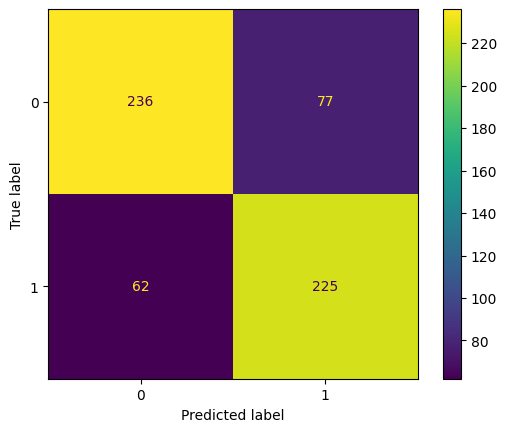

In [256]:
display = ConfusionMatrixDisplay(confusion)
display.plot()